In [1]:
import scipy as sp
import pandas as pd
import numpy as np
import importlib
import lftmodels
import lftlib
import matplotlib.pyplot as plt
import lmfit
import lftfit
from lmfit import Model

importlib.reload(lftmodels)
importlib.reload(lftlib)

# file pre-processing
# 1. Renamed AST, ALT, alk phos synonyms >> saved as _clean.txt
# TO DO
# 1. rename INR, creat, bilirubin synonyms

importlib.reload(lftlib)

ALT_fits=pd.read_csv('trajectories/all_abn_v2/fits/ALT_p2t_fit_table_full.csv',index_col=0)
AST_fits=pd.read_csv('trajectories/all_abn_v2/fits/AST_p2t_fit_table_full.csv',index_col=0)

In [2]:
ALT_fits_small=ALT_fits[['d_EX_ALT','t0_ALT','INR_value','TBILI_value','CR_value']].copy()
AST_fits_small=AST_fits[['d_EX_AST','t0_AST','INR_value','TBILI_value','CR_value']].copy()
ALT_fits_small_good=ALT_fits[ALT_fits.nRMSD_EX_ALT<.03][['d_EX_ALT','t0_ALT','INR_value','TBILI_value','CR_value']].copy()
AST_fits_small_good=AST_fits[AST_fits.nRMSD_EX_AST<.03][['d_EX_AST','t0_AST','INR_value','TBILI_value','CR_value']].copy()

In [3]:
print(ALT_fits_small.shape[0])
ALT_fits_small.corr()

22837


,d_EX_ALT,t0_ALT,INR_value,TBILI_value,CR_value
d_EX_ALT,1.000000,0.034466,0.022068,-0.007761,0.032667
t0_ALT,0.034466,1.000000,-0.057027,-0.037457,-0.036109
INR_value,0.022068,-0.057027,1.000000,0.095126,0.139495
TBILI_value,-0.007761,-0.037457,0.095126,1.000000,0.056747
CR_value,0.032667,-0.036109,0.139495,0.056747,1.000000


In [4]:
print(AST_fits_small.shape[0])
AST_fits_small.corr()

15751


,d_EX_AST,t0_AST,INR_value,TBILI_value,CR_value
d_EX_AST,1.000000,0.068796,0.024926,-0.058158,0.011707
t0_AST,0.068796,1.000000,-0.054650,-0.045059,-0.036800
INR_value,0.024926,-0.054650,1.000000,0.091454,0.145729
TBILI_value,-0.058158,-0.045059,0.091454,1.000000,0.050054
CR_value,0.011707,-0.036800,0.145729,0.050054,1.000000


In [5]:
print(ALT_fits_small_good.shape[0])
ALT_fits_small_good.corr()

9173


,d_EX_ALT,t0_ALT,INR_value,TBILI_value,CR_value
d_EX_ALT,1.000000,0.015091,-0.002233,0.026506,0.020188
t0_ALT,0.015091,1.000000,-0.067690,-0.037162,-0.049649
INR_value,-0.002233,-0.067690,1.000000,0.113295,0.115994
TBILI_value,0.026506,-0.037162,0.113295,1.000000,0.054502
CR_value,0.020188,-0.049649,0.115994,0.054502,1.000000


In [6]:
print(AST_fits_small_good.shape[0])
AST_fits_small_good.corr()

5917


,d_EX_AST,t0_AST,INR_value,TBILI_value,CR_value
d_EX_AST,1.000000,0.067489,-0.012459,-0.022001,-0.022634
t0_AST,0.067489,1.000000,-0.054099,-0.029792,-0.042500
INR_value,-0.012459,-0.054099,1.000000,0.105988,0.144859
TBILI_value,-0.022001,-0.029792,0.105988,1.000000,0.067401
CR_value,-0.022634,-0.042500,0.144859,0.067401,1.000000


In [7]:
ALT_fits_small_ARF=ALT_fits_small_good[ALT_fits_small_good.CR_value>2].copy()
AST_fits_small_ARF=AST_fits_small_good[AST_fits_small_good.CR_value>2].copy()

In [8]:
print(ALT_fits_small_ARF.shape[0])
ALT_fits_small_ARF.corr()

2017


,d_EX_ALT,t0_ALT,INR_value,TBILI_value,CR_value
d_EX_ALT,1.000000,0.038459,-0.020119,0.050655,0.023906
t0_ALT,0.038459,1.000000,-0.095708,-0.032163,-0.105317
INR_value,-0.020119,-0.095708,1.000000,0.064980,-0.050349
TBILI_value,0.050655,-0.032163,0.064980,1.000000,-0.041240
CR_value,0.023906,-0.105317,-0.050349,-0.041240,1.000000


In [9]:
print(AST_fits_small_ARF.shape[0])
AST_fits_small_ARF.corr()

1662


,d_EX_AST,t0_AST,INR_value,TBILI_value,CR_value
d_EX_AST,1.000000,0.056947,-0.019361,0.036918,-0.000473
t0_AST,0.056947,1.000000,-0.084878,0.002670,-0.077936
INR_value,-0.019361,-0.084878,1.000000,0.059637,-0.039743
TBILI_value,0.036918,0.002670,0.059637,1.000000,0.006383
CR_value,-0.000473,-0.077936,-0.039743,0.006383,1.000000


In [10]:
ALT_fits_small_ALF=ALT_fits_small[(ALT_fits_small.INR_value>2) & (ALT_fits_small.TBILI_value>3)].copy()
AST_fits_small_ALF=AST_fits_small[(AST_fits_small.INR_value>2) & (AST_fits_small.TBILI_value>3)].copy()
ALT_fits_small_ALF_good=ALT_fits_small_good[(ALT_fits_small_good.INR_value>2) & (ALT_fits_small_good.TBILI_value>3)].copy()
AST_fits_small_ALF_good=AST_fits_small_good[(AST_fits_small_good.INR_value>2) & (AST_fits_small_good.TBILI_value>3)].copy()

In [11]:
print(ALT_fits_small_ALF.shape[0])
ALT_fits_small_ALF.corr()

1390


,d_EX_ALT,t0_ALT,INR_value,TBILI_value,CR_value
d_EX_ALT,1.000000,0.070534,0.014700,-0.025989,0.013911
t0_ALT,0.070534,1.000000,-0.125992,-0.018005,-0.013062
INR_value,0.014700,-0.125992,1.000000,0.043430,0.000568
TBILI_value,-0.025989,-0.018005,0.043430,1.000000,-0.000128
CR_value,0.013911,-0.013062,0.000568,-0.000128,1.000000


In [12]:
print(AST_fits_small_ALF.shape[0])
AST_fits_small_ALF.corr()

1315


,d_EX_AST,t0_AST,INR_value,TBILI_value,CR_value
d_EX_AST,1.000000,0.068423,0.016147,-0.131090,0.009693
t0_AST,0.068423,1.000000,-0.123139,0.036141,-0.055526
INR_value,0.016147,-0.123139,1.000000,-0.009811,0.000747
TBILI_value,-0.131090,0.036141,-0.009811,1.000000,-0.007089
CR_value,0.009693,-0.055526,0.000747,-0.007089,1.000000


In [13]:
print(ALT_fits_small_ALF_good.shape[0])
ALT_fits_small_ALF_good.corr()

569


,d_EX_ALT,t0_ALT,INR_value,TBILI_value,CR_value
d_EX_ALT,1.000000,0.068976,-0.013612,0.059041,-0.035780
t0_ALT,0.068976,1.000000,-0.166237,-0.040401,-0.073166
INR_value,-0.013612,-0.166237,1.000000,0.103776,-0.028351
TBILI_value,0.059041,-0.040401,0.103776,1.000000,0.004418
CR_value,-0.035780,-0.073166,-0.028351,0.004418,1.000000


In [14]:
print(AST_fits_small_ALF_good.shape[0])
AST_fits_small_ALF_good.corr()

522


,d_EX_AST,t0_AST,INR_value,TBILI_value,CR_value
d_EX_AST,1.000000,0.111323,0.005630,-0.118791,-0.019922
t0_AST,0.111323,1.000000,-0.165082,0.054855,-0.003904
INR_value,0.005630,-0.165082,1.000000,-0.013635,0.009480
TBILI_value,-0.118791,0.054855,-0.013635,1.000000,-0.026745
CR_value,-0.019922,-0.003904,0.009480,-0.026745,1.000000


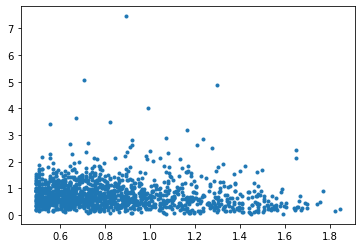

In [15]:
plt.plot(np.log10(AST_fits_small_ALF.TBILI_value),AST_fits_small_ALF.d_EX_AST,'.')